In [53]:
#  This article discusses the basics of linear regression and its implementation in the Python
#  programming language.
#  Linear regression is a statistical method for modeling relationships between a dependent va
#  riable with a given set of independent variables.
#  Note: In this article, we refer to dependent variables as responses and independent variables as
#  features for simplicity.
#  In order to provide a basic understanding of linear regression, we start with the most basi
#  c version of linear regression, i.e. Simple linear regression.
#  Simple Linear Regression
#  Simple linear regression is an approach for predicting a response using a single feature.
#  It is assumed that the two variables are linearly related. Hence, we try to find a linear function
#  that predicts the response value(y) as accurately as possible as a function of the feature or 
#  independent variable(x).
#  Let us consider a dataset where we have a value of response y for every feature x: 
#    

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
df=pd.read_csv("D:/delivery_time (1).csv")

In [5]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
# Here the dependent Variable is Delievery Time and independent variable is shorting Time.......

# EDA And Data Visulization........

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

T:\Users\aishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


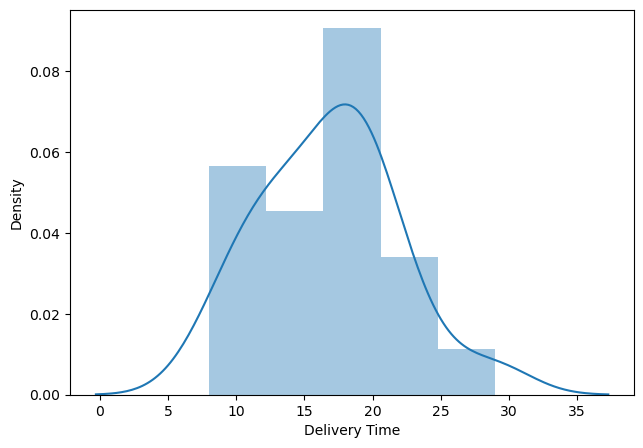

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["Delivery Time"])

plt.show()

T:\Users\aishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


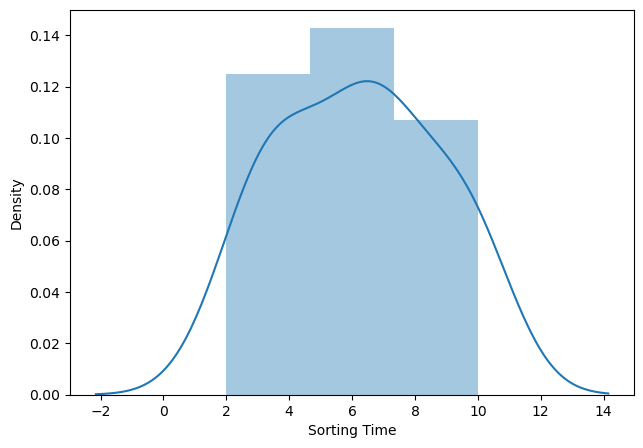

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["Sorting Time"])

plt.show()

In [11]:
# Renaming The column..............

In [12]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Corellation Analysys............

In [13]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [14]:
x=df[["sorting_time"]]
y=df["delivery_time"]

Text(0.5, 1.0, 'This is a Box plot For Shorting Time')

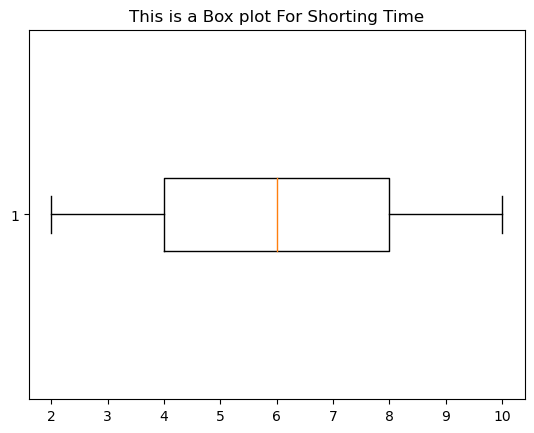

In [15]:
plt.boxplot(x,vert=False,widths=0.2)
plt.title("This is a Box plot For Shorting Time")
 


Text(0.5, 1.0, 'This is a Box plot For Delivery  Time')

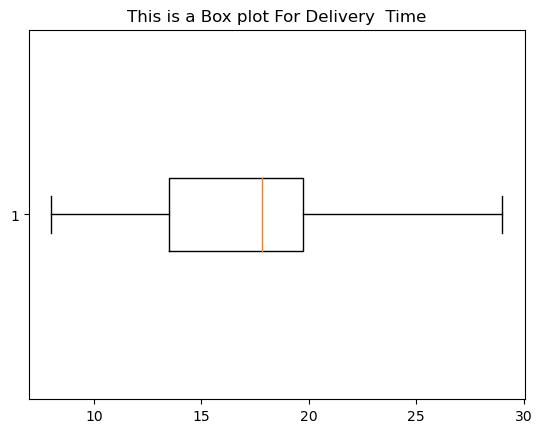

In [16]:
plt.boxplot(y,vert=False,widths=0.2)
plt.title("This is a Box plot For Delivery  Time")
 


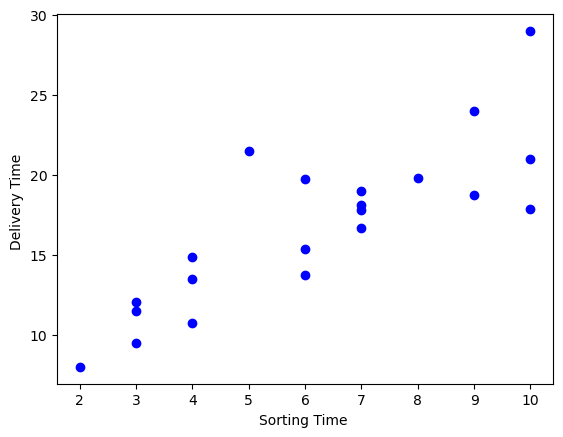

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.xlabel("Sorting Time ")
plt.ylabel("Delivery Time ")

plt.show()

# Corelation Visulition Between Two Variable

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

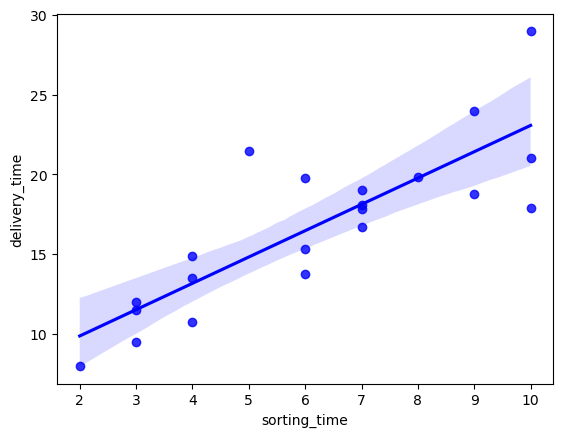

In [18]:
import matplotlib.pyplot as plt
sns.regplot(x=df["sorting_time"],y=df["delivery_time"],color="blue")


# Checking for Homoscedasticity or Hetroscedasticity

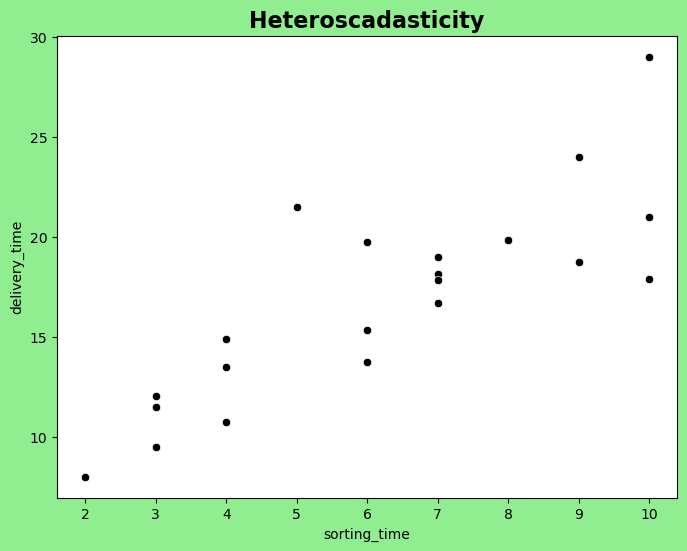

In [19]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['sorting_time'], y = df['delivery_time'],color="black")
plt.title('Heteroscadasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [20]:
# Now, the task is to find a line that fits best in the above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in a dataset)
# This line is called a regression line.
# The equation of regression line is represented as:
# h(xi)=beta(not)+beta(1)*x(i)  



In [21]:
df.var()

delivery_time    25.754619
sorting_time      6.461905
dtype: float64

# In the Above Begining To last Variables Are non-Continuous So we can Say Its Follow Heteroscadisticity...................

# Feature Engineering
Trying different transformation of data to estimate normal distribution and remove any skewness

T:\Users\aishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


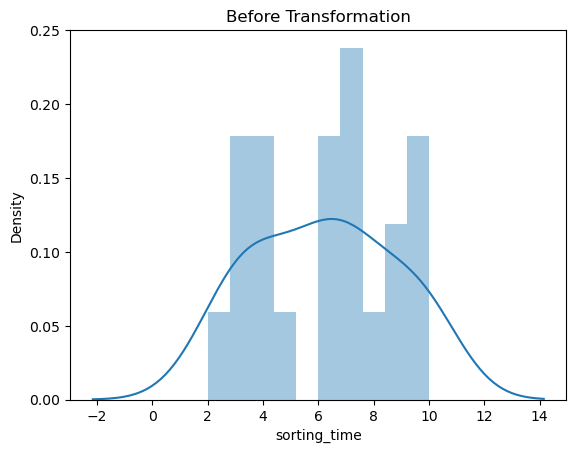

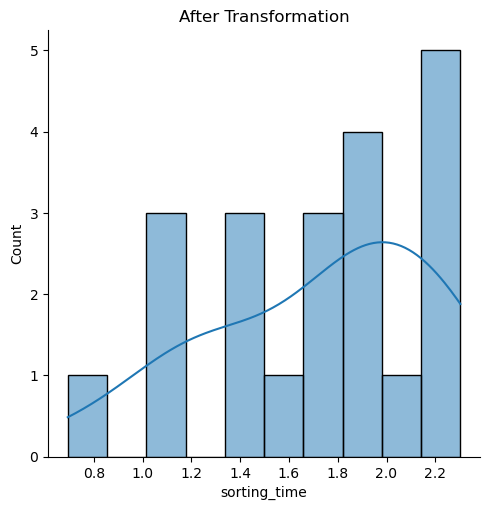

In [22]:
Labels=["Before Transformation","After Transformation"]
sns.distplot(df['sorting_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['sorting_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

T:\Users\aishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
T:\Users\aishw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


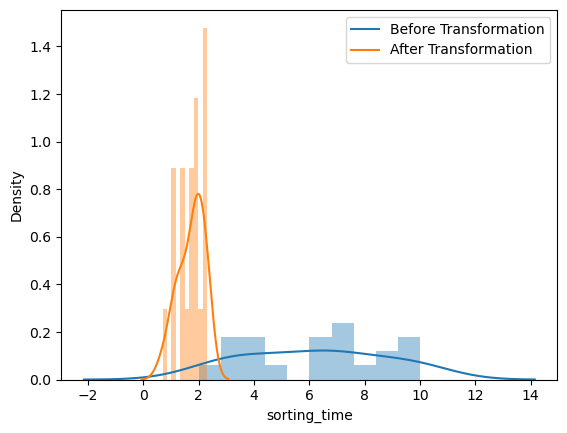

In [23]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['sorting_time'], bins = 10, kde = True)
sns.distplot(np.log(df['sorting_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

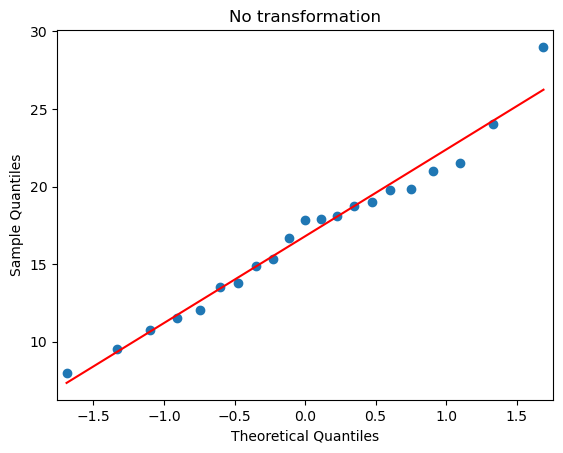

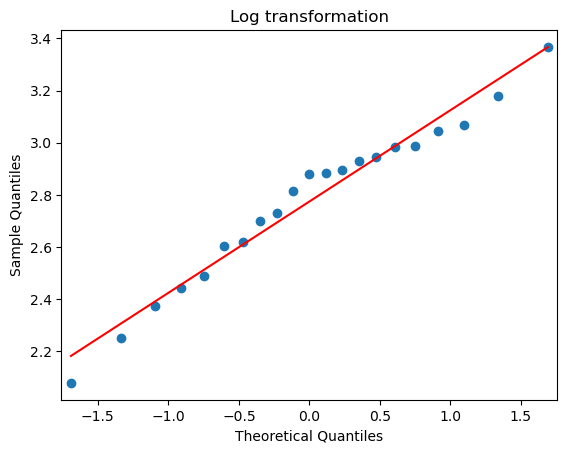

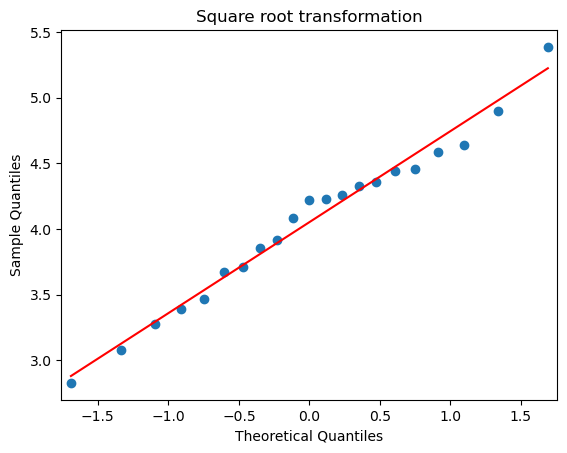

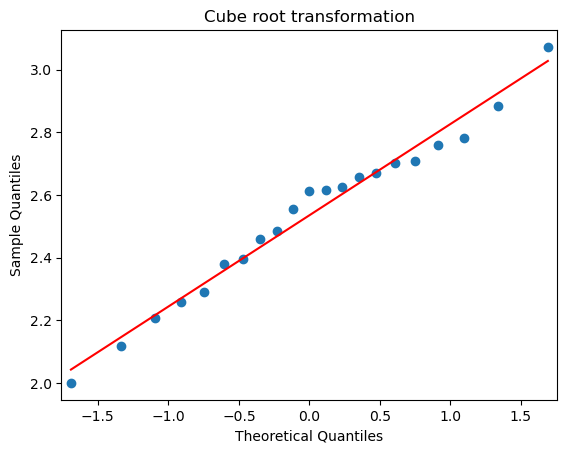

In [24]:
import statsmodels.api as smf
smf.qqplot(df['delivery_time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['delivery_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['delivery_time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Important Note:
We only Perform any data transformation when the data is skewed or not normal distribution N(0,1)

# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression It is a statistical method of analysis that 
estimates the relationship between one or more independent variables and a dependent variable; 
the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the
dependent variable configured as a straight line...............

In [25]:
import statsmodels.formula.api as sm
model = sm.ols('delivery_time~sorting_time', data = df).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        16:14:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root transformation on data

In [27]:
model1 = sm.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 22 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                            16:14:25   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cuberoot transformation on Data

In [28]:
model2 = sm.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Wed, 22 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                            16:14:25   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data

In [29]:
model3 = sm.ols('np.log(delivery_time)~np.log(sorting_time)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 22 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                           16:14:25   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
x=df[["sorting_time"]]
y=df["delivery_time"]

In [31]:
from sklearn.linear_model import LinearRegression# for import linear Regression FFormula....
LR=LinearRegression()
LR.fit(x,y)

LinearRegression()

In [32]:
Intercept=LR.intercept_.round(3)

In [33]:
Sorting_Time=(LR.coef_).round(3)

In [34]:
print(Intercept)
print(float(Sorting_Time))

6.583
1.649


# Model Will Prediction..........

In [87]:
model=LR.predict(x)

In [88]:
model

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

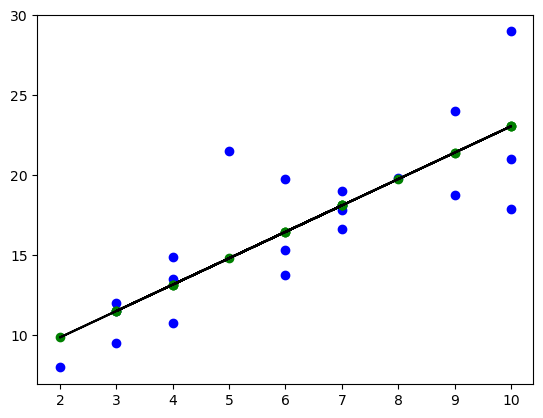

In [89]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model,color="green")
plt.plot(df["sorting_time"],model,color="black")
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,model)
print("Mean Squared Error Will be : ",mse.round(3))
RSE=np.sqrt(mse).round(3)
print("Root mean Squared Error will be : ",np.sqrt(mse).round(3))
print("R Square value will be :",r2_score(y,model).round(3))

Mean Squared Error Will be :  7.793
Root mean Squared Error will be :  2.792
R Square value will be : 0.682


In [91]:
RSE

2.792

# Model Validation

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value. Comparing different models with respect to the Root Mean Squared Errors


In [92]:
from sklearn.metrics import mean_squared_error
model1_pred_y =np.square(model1.predict(df['sorting_time']))
model2_pred_y =pow(model2.predict(df['sorting_time']),3)
model3_pred_y =np.exp(model3.predict(df['sorting_time']))

# FOR MODEL 1

In [93]:
from sklearn.metrics import mean_squared_error,r2_score
mse1=mean_squared_error(y,model1_pred_y)
print("Mean Squared Error Will be : ",mse1.round(3))
RSE1=np.sqrt(mse1).round(3)
print("Root Mean Squared Error Will be :",RSE1.round(3))
print("R Square value will be :",r2_score(y,model1_pred_y).round(3))

Mean Squared Error Will be :  7.63
Root Mean Squared Error Will be : 2.762
R Square value will be : 0.689


# FOR MODEL 2

In [94]:
from sklearn.metrics import mean_squared_error,r2_score
mse2=mean_squared_error(y,model2_pred_y)
print("Mean Squared Error Will be : ",mse2.round(3))
RSE2=np.sqrt(mse2).round(3)
print("Root Mean Squared Error Will be :",RSE2.round(3))
print("R Square value will be :",r2_score(y,model2_pred_y).round(3))

Mean Squared Error Will be :  7.593
Root Mean Squared Error Will be : 2.756
R Square value will be : 0.69


# FOR MODEL 3

In [95]:
from sklearn.metrics import mean_squared_error,r2_score
mse3=mean_squared_error(y,model3_pred_y)
print("Mean Squared Error Will be : ",mse3.round(3))
RSE3=np.sqrt(mse3).round(3)
print("Root Mean Squared Error Will be :",RSE3.round(3))
print("R Square value will be :",r2_score(y,model3_pred_y).round(3))

Mean Squared Error Will be :  7.54
Root Mean Squared Error Will be : 2.746
R Square value will be : 0.693


In [96]:
rmse={'model': RSE, 'model1': RSE1, 'model2': RSE2, 'model3' : RSE3}
min(rmse,key=rmse.get)

'model3'

# As model3 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values

Model3 is that Simple Linear regression model where we did Log Transformation perfermation and got the highest Adjusted R-squaredvalue


# Predicting values

In [97]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['sortin_time'] = df.sorting_time
predicted2['delivery_time'] = df.delivery_time
predicted2['Predicted_delivery_time_Hike'] = pd.DataFrame(model)
predicted2

,sortin_time,delivery_time,Predicted_delivery_time_Hike
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


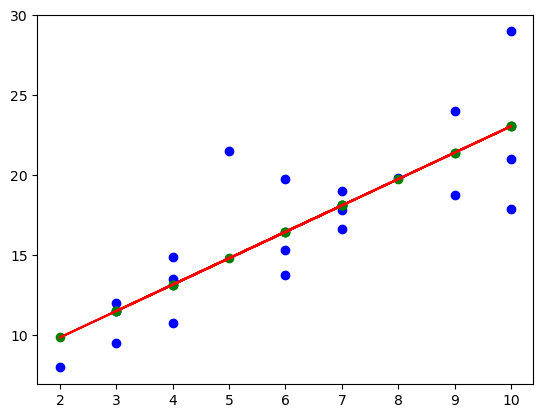

In [98]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model,color="green")
plt.plot(df["sorting_time"],model,color="red")
plt.show()

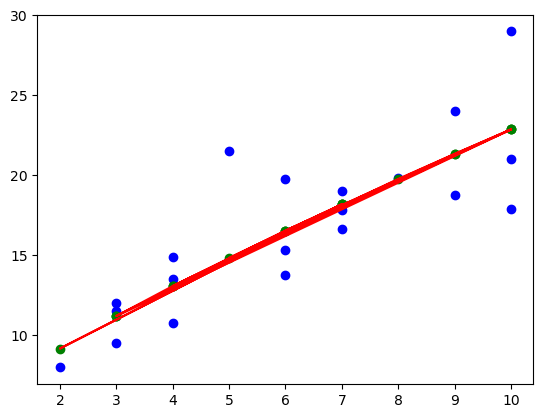

In [99]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model1_pred_y,color="green")
plt.plot(df["sorting_time"],model1_pred_y,color="red")
plt.show()

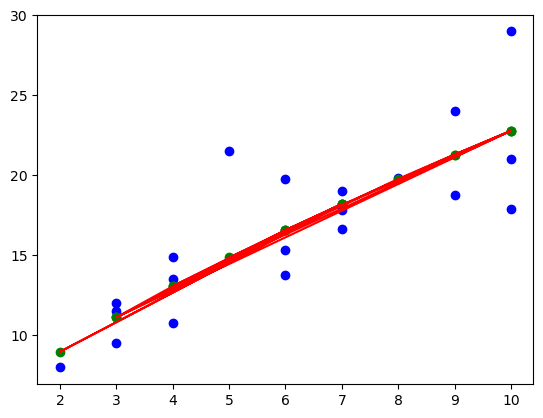

In [100]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model2_pred_y,color="green")
plt.plot(df["sorting_time"],model2_pred_y,color="red")
plt.show()

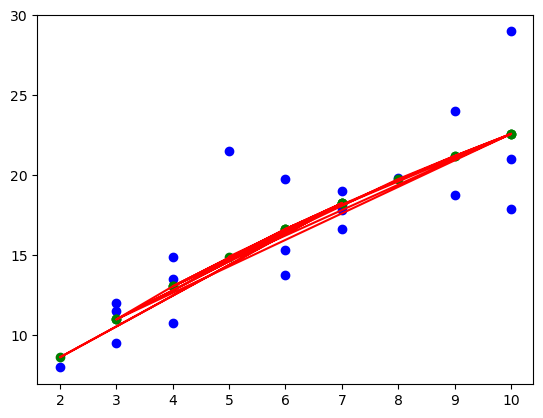

In [101]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model3_pred_y,color="green")
plt.plot(df["sorting_time"],model3_pred_y,color="red")
plt.show()

In [102]:
from PIL import Image, ImageFont, ImageDraw 

In [103]:
my_image = Image.open("D:/1000_F_132122695_cNuq5ACUnfSfqmRgJSP1rRiGVHdVedl6.jpg")

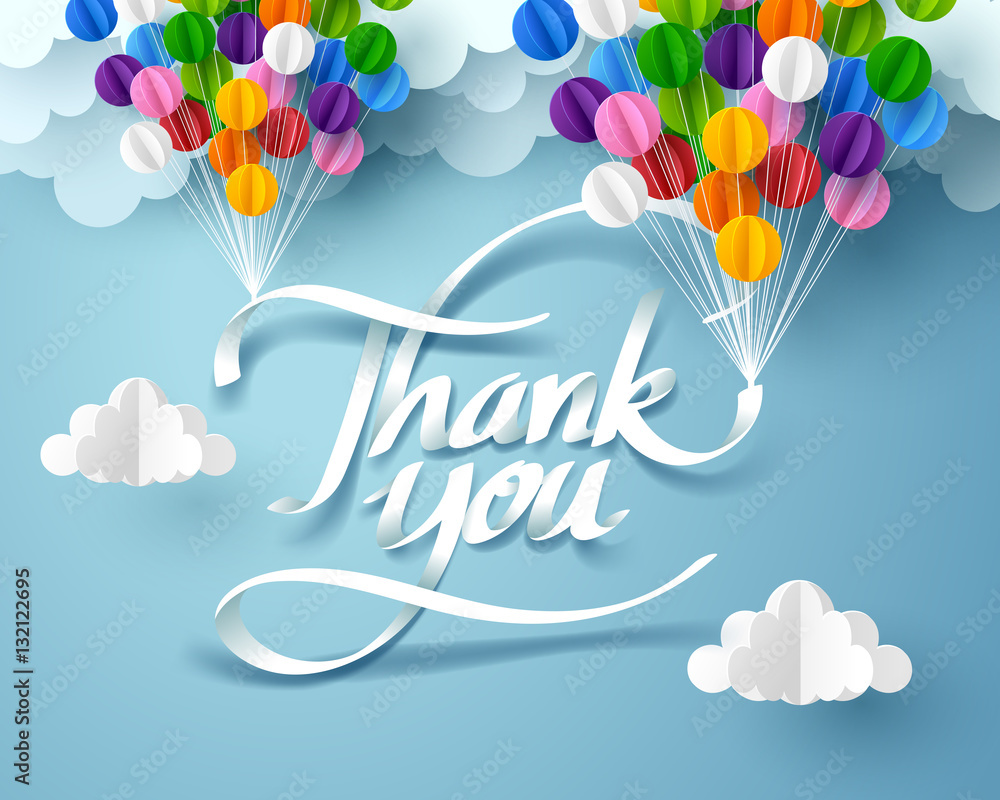

In [104]:
my_image